---
# TP : Page Rank Algorithm     
---
*redige par Ergi DIBRA et Yuge SUN*

## Question 1

On fait initialiser la matrice $A_1$ qui correspond au graphe de l'exemple 1.

In [80]:
graphics_toolkit("gnuplot");
warning('off','all');
clear
clc
close all
A=cell(3,1);
A{1}=zeros(10);
A{1}(2,[1,4])=1;
A{1}(3,2)=1;
A{1}(4,[2,3])=1;
A{1}(5,[1,6])=1;
A{1}(6,5)=1;
A{1}(7,[4,6,9])=1;
A{1}(8,[7,9])=1;
A{1}(9,8)=1;
A{1}(10,3)=1;
A{1}

ans =

   0   0   0   0   0   0   0   0   0   0
   1   0   0   1   0   0   0   0   0   0
   0   1   0   0   0   0   0   0   0   0
   0   1   1   0   0   0   0   0   0   0
   1   0   0   0   0   1   0   0   0   0
   0   0   0   0   1   0   0   0   0   0
   0   0   0   1   0   1   0   0   1   0
   0   0   0   0   0   0   1   0   1   0
   0   0   0   0   0   0   0   1   0   0
   0   0   1   0   0   0   0   0   0   0



On fait initialiser la matrice $A_2$ qui correspond au graphe de l'exemple 2.

In [81]:
A{2}=zeros(10);
A{2}(1,2)=1;
A{2}(2,[3,4])=1;
A{2}(3,[4,10])=1;
A{2}(4,[5,8])=1;
A{2}(5,[6,3])=1;
A{2}(6,[2,7])=1;
A{2}(7,8)=1;
A{2}(8,9)=1;
A{2}(9,10)=1;
A{2} 


ans =

   0   1   0   0   0   0   0   0   0   0
   0   0   1   1   0   0   0   0   0   0
   0   0   0   1   0   0   0   0   0   1
   0   0   0   0   1   0   0   1   0   0
   0   0   1   0   0   1   0   0   0   0
   0   1   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   1   0   0
   0   0   0   0   0   0   0   0   1   0
   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   0   0   0   0



On fait initialiser la matrice $A_3$ qui correspond au graphe de l'exemple 3.

In [82]:
%On cree la matrice d'adjacence de graphe de l'exemple 2
A{3}=zeros(10);
A{3}(2,1)=1;
A{3}(3,2)=1;
A{3}(4,[2,3])=1;
A{3}(5,6)=1;
A{3}(6,5)=1;
A{3}(7,9)=1;
A{3}(8,[7,9])=1;
A{3}(9,8)=1;
A{3}(10,3)=1;
A{3}

ans =

   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0
   0   1   0   0   0   0   0   0   0   0
   0   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   1   0
   0   0   0   0   0   0   1   0   1   0
   0   0   0   0   0   0   0   1   0   0
   0   0   1   0   0   0   0   0   0   0



Afin de verifier la bonne saisie des matrices d'adjacence, on cree la fonction *graphl(A,coord,x)* qui fait dessiner le graphe d'une des trois matrices $A_1,A_2,A_3$ (le paramatre *x* determine laquelle des trois matrices sera prise comme parametre. On definit aussi nous memes les coordonees des noeuds dans les 3 cas. Les graphes seront sauvegardes sous le nom *graphes.pdf*.

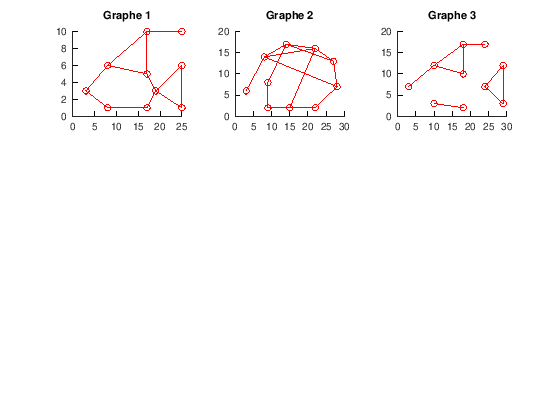

In [83]:
%Ici on definie les coordonees des 3 graphes
coord=cell(3,1);
[coord{1},coord{2},coord{3}]=deal([3 3; 8 6; 17 10; 17 5; 8 1; 17 1; 19 3; 25 1; 25 6; 25 10],[3 6; 8 14; 14 17; 22 16; 27 13; 28 7; 22 2; 15 2; 9 2; 9 8],[3 7; 10 12; 18 17; 18 10; 10 3; 18 2; 24 7; 29 3; 29 12; 24 17]);
%Ici on fait dessiner les 3 graphes dans une seule figure
h=figure('PaperPositionMode', 'auto','visible','off');
subplot(3,3,1);
title('Graphe 1')
graphpl(A,coord,1);
subplot(3,3,2);
title('Graphe 2')
graphpl(A,coord,2);
subplot(3,3,3);
title('Graphe 3')
graphpl(A,coord,3);
print(h,'-dpdf','graphes.pdf'); #sauvegarde les graphes sous le fichier graphes.pdf

Donc on a bien obtenu les graphes de l'enonce.
## Question 2
On introduit $N_j=\sum\limits_{k=1}^N A_{kj}$ qui correspond au nombre total de liens sortant de la page $j$. Ce nombre est en effet la somme sur la $j^{eme}$ colonne d'une matrice. Compte tenu de ce fait, on introduit $N_1,N_2,N_3$ les trois vecteurs contenant la somme par colonne de nos matrices $A_1,A_2,A_3$.

In [84]:
[N,Q]=deal(cell(3,1));
[N{1},N{2},N{3}]=deal(sum(A{1}),sum(A{2}),sum(A{3}));

N{1}
N{2}
N{3}

ans =

   2   2   2   2   1   2   1   1   2   0

ans =

   0   2   2   2   1   1   1   2   1   2

ans =

   1   2   2   0   1   1   1   1   2   0



Ensuite on construit les matrices $Q_1,Q_2,Q_3$ suivant la regle dessous-mentionne (pour chaque matrice Q) :


$$  \begin{equation}
    Q_{ij}=
    \begin{cases}
      \dfrac{A_{ij}}{N_{ij}}, & \text{si}\ N_j=1\\
      0, & \text{sinon}
    \end{cases}
  \end{equation}$$

In [85]:
[Q{1},Q{2},Q{3}]=deal(zeros(10));

for k = 1:3
        for i = 1:10
                for j = 1:10
                        if (N{k}(j) > 0)
                                Q{k}(i,j)=A{k}(i,j)/N{k}(j);
                        else
                                Q{k}(i,j)=0;
                        endif
                end
        end
end



Donc on obtient:

$Q_1$ :

In [86]:
Q{1}

ans =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.50000   0.00000   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.50000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.50000   0.00000   0.00000   0.00000   0.00000   0.50000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.50000   0.00000   0.50000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   1.00000
   0.00000   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 9 and 10:

   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.50000   

$Q_2$ :

In [87]:
Q{2}

ans =

 Columns 1 through 8:

   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.50000   0.50000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000   0.00000   0.50000
   0.00000   0.00000   0.50000   0.00000   0.00000   1.00000   0.00000   0.00000
   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.50000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 9 and 10:

   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.50000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   

$Q_3$

In [88]:
Q{3}

ans =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.50000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   1.00000
   0.00000   0.00000   0.50000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 9 and 10:

   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.00000   0.00000
   0.50000   

On peut donc introduire le vecteur $r\in ℝ^n$ dont la $i^{eme}$ composante chiffre la pertinence de la page $i$. Ce vecteur verifie :

$$r_i = \sum\limits_{j=1}^N Q_{ij}r_{j}$$

Ainsi cela revient a ressoudre :
$$Qr=r$$


Donc on a ramene le probleme du classement des pages web a la recherche d'un vecteur propre pour une enorme matrice associe a la valeur propre $1$.


## Question 3

Verifions maintenant ques pour les matrices $Q_1,Q_3$ on admet $1$ comme valeur propre et montrons que cela n'est pas le cas pour $Q_2$.

In [89]:
eig(Q{1}) #Les valeurs propres de Q1
eig(Q{2}) #Les valeurs propres de Q2
eig(Q{3}) #Les valeurs propres de Q3

ans =

   0.00000 + 0.00000i
  -0.50000 + 0.50000i
  -0.50000 - 0.50000i
  -0.33118 + 0.28114i
  -0.33118 - 0.28114i
   1.00000 + 0.00000i
   0.66236 + 0.00000i
   0.70711 + 0.00000i
  -0.70711 + 0.00000i
   0.00000 + 0.00000i

ans =

   0.00000 + 0.00000i
   0.88465 + 0.00000i
  -0.00000 + 0.70711i
  -0.00000 - 0.70711i
  -0.44232 + 0.29487i
  -0.44232 - 0.29487i
   0.00000 + 0.00000i
   0.00000 + 0.00000i
   0.00000 + 0.00000i
   0.00000 + 0.00000i

ans =

   1.00000 + 0.00000i
  -1.00000 + 0.00000i
   1.00000 + 0.00000i
  -0.50000 + 0.50000i
  -0.50000 - 0.50000i
   0.00000 + 0.00000i
   0.00000 + 0.00000i
   0.00000 + 0.00000i
   0.00000 + 0.00000i
   0.00000 + 0.00000i



On voit bien que le vecteur des valeurs propres de $Q_1,Q_3$ contient $1$ comme valeur propre et que $Q_2$ ne l'admet pas.

Ainsi il peut arriver que la matrice Q n'admette pas la valeur propre $1$. Pour contourner ce probleme on va modifier $Q$ notamment pour intervenir sur ses colonnes nulles. Pour ce faire on introduit $P \in M_N(ℝ)$ definie par:

$$P = Q + \dfrac{1}{N}ed^T$$

avec $e \in ℝ^n$ le vecteur unitaire $e=(1,\cdots,1)^T$ et $d \in ℝ^N$ le vecteur dont la $j^{eme}$ composante est donne par :

$$  \begin{equation}
    d_{j}=
    \begin{cases}
      1, & \text{si}\ N_j=0\\
      0, & \text{sinon}
    \end{cases}
  \end{equation}$$
  
Donc on construit $e$ et $d_1^T,d_2^T,d_3^T$ (pour les trois exemples) :

In [90]:
e = ones(10,1);
d=cell(3,1);
[d{1},d{2},d{3}]=deal(zeros(1,10));
for k = 1:3
    for j = 1:10
        if (!N{k}(j))
            d{k}(j)=1;
        end
    end
end

## Question 4

On construit maintenant les matrices $P_i$ pour $i=1\ldots3$.

In [91]:
P=cell(3,1);
for k = 1:3
    P{k}=Q{k}+(1/10)*e*d{k};
end

On verifie ensuite qu'elles admettent $1$ comme valeur propre.

In [92]:
eig(P{1})
eig(P{2})
eig(P{3})

ans =

   1.00000 + 0.00000i
   0.73709 + 0.00000i
   0.70711 + 0.00000i
  -0.70711 + 0.00000i
  -0.50000 + 0.50000i
  -0.50000 - 0.50000i
  -0.31854 + 0.26099i
  -0.31854 - 0.26099i
   0.00000 + 0.00000i
  -0.00000 + 0.00000i

ans =

   1.00000 + 0.00000i
   0.36581 + 0.36047i
   0.36581 - 0.36047i
   0.02597 + 0.70268i
   0.02597 - 0.70268i
  -0.20846 + 0.45514i
  -0.20846 - 0.45514i
  -0.45895 + 0.25207i
  -0.45895 - 0.25207i
  -0.34875 + 0.00000i

ans =

  -0.50000 + 0.50000i
  -0.50000 - 0.50000i
  -0.07014 + 0.41632i
  -0.07014 - 0.41632i
  -0.38616 + 0.00000i
   0.00000 + 0.00000i
   0.72643 + 0.00000i
   1.00000 + 0.00000i
  -1.00000 + 0.00000i
   1.00000 + 0.00000i



On remarque que $1$ est bien une valeur propre des trois nouvelles matrices et en effet elle a une multiplicite $2$ pour la matrice $Q_3$. Afin de eviter cela, on va modifier encore la matrice en introduisant la matrice :

$$A_\alpha = \alpha P + (1-\alpha)\dfrac{1}{N}ee^T$$

## Question 5

On construit donc $A_{\alpha i}$ pour $i=1\ldots3$ et $\alpha = 0.1$.

In [93]:
alpha=0.1;
Aalpha1=cell(3,1);
for k = 1:3
    Aalpha1{k} = alpha*P{k} + (1-alpha)*(1/10)*e*transpose(e);
end

On construit encore $A_{\alpha i}$ pour $i=1\ldots3$ et $\alpha = 0.5$.

In [94]:
alpha=0.5;
Aalpha5=cell(3,1);
for k = 1:3
    Aalpha5{k} = alpha*P{k} + (1-alpha)*(1/10)*e*transpose(e);
end

Ensuite on determine les modules des valeurs propres (des matrices dessus-mentionnes)  et on les classe par ordre decroissant (on sauvegarde ces valeurs dans un vecteur $a$ pour les matrices correspondant a $\alpha = 0.1$ et dans $b$ pour les matrices correspondant a $\alpha = 0.5$  :

In [95]:
a=cell(3,1);
b=cell(3,1);
for k = 1:3
    a{k} = sort(abs(eig(Aalpha1{k})),'descend');
    b{k} = sort(abs(eig(Aalpha5{k})),'descend');
end

Au final l'algorithme revient a determiner pour $0<\alpha<1$, le vecteur $r_\alpha \in ℝ^n$ qui verifie :

$$A_\alpha r_\alpha = r_\alpha$$

i.e $r_\alpha$ le vecteur propre associe a la valeur propre $1$ de la matrice $A_\alpha$.

## Question 6

On ecrit l'algorithme de la methode de puissance et on l'applique au cas $\alpha = 0.1$. (Voire *puiss.m*).

In [112]:
tst = rand(10,1);
tst = tst/norm(tst);

[r_trouve,n_iter] = puiss(tst,Aalpha1,1,a);
r_trouve
n_iter

r_trouve =

   0.090958
   0.100545
   0.095985
   0.100784
   0.100556
   0.101013
   0.106129
   0.106652
   0.101623
   0.095757

n_iter =  10000


Pour ettre sur d'avoir trouve le bon vecteur on multiplie la matrice par le vecteur. En effet on voit qu'on a trouve le bon vecteur pour la valeur propre $1$.

In [114]:
Aalpha1{1}*r_trouve

ans =

   0.090958
   0.100545
   0.095985
   0.100784
   0.100556
   0.101013
   0.106129
   0.106652
   0.101623
   0.095757



In [ ]:
D